In [ ]:
import pandas as pd

In [ ]:
#importing data
nba=pd.read_csv('/content/game.csv')
nba.shape
nba.tail()

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,...,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,...,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,...,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star
65697,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All Star


In [ ]:
nba['season_type'].value_counts()

season_type
Regular Season    60192
Playoffs           3842
Pre Season         1536
All Star             65
All-Star             63
Name: count, dtype: int64

Since we are evaluating a trend in the game, we cannot include all-star game and preseason data since it is an exhibition game and those stats can skew the data.


In [ ]:
#dropping non regular season and playoff games
nba=nba[nba['season_type'].isin(['Regular Season','Playoffs'])]
nba.shape

(64034, 55)

In [ ]:
#dropping irrelevant columns
nba_3=nba.loc[:, ['game_date', 'pts_home', 'pts_away', 'fg3m_home', 'fg3a_home', 'fg3m_away', 'fg3a_away',
                  'fgm_home', 'fga_home', 'fgm_away', 'fga_away']]

In [ ]:
nba_3.tail()

,game_date,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away,fgm_home,fga_home,fgm_away,fga_away
65691,2023-06-01 00:00:00,104.0,93.0,8.0,27.0,13.0,39.0,40.0,79.0,39.0,96.0
65692,2023-06-04 00:00:00,108.0,111.0,11.0,28.0,17.0,35.0,39.0,75.0,38.0,78.0
65693,2023-06-07 00:00:00,94.0,109.0,11.0,35.0,5.0,18.0,34.0,92.0,41.0,80.0
65694,2023-06-09 00:00:00,95.0,108.0,8.0,25.0,14.0,28.0,35.0,78.0,39.0,79.0
65695,2023-06-12 00:00:00,94.0,89.0,5.0,28.0,9.0,35.0,38.0,84.0,33.0,96.0


In [ ]:
#creating new columns for 2 point attempts
nba_3['fg2m_home']=nba_3['fgm_home']-nba_3['fg3m_home']
nba_3['fg2a_home']=nba_3['fga_home']-nba_3['fg3a_home']
nba_3['fg2m_away']=nba_3['fgm_away']-nba_3['fg3m_away']
nba_3['fg2a_away']=nba_3['fga_away']-nba_3['fg3a_away']
nba_3.tail(2) #checking to see if calculations were correct

,game_date,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away,fgm_home,fga_home,fgm_away,fga_away,fg2m_home,fg2a_home,fg2m_away,fg2a_away
65694,2023-06-09 00:00:00,95.0,108.0,8.0,25.0,14.0,28.0,35.0,78.0,39.0,79.0,27.0,53.0,25.0,51.0
65695,2023-06-12 00:00:00,94.0,89.0,5.0,28.0,9.0,35.0,38.0,84.0,33.0,96.0,33.0,56.0,24.0,61.0


In [ ]:
#delete total field goal attemps and made for road and away
nba_3=nba_3.drop(columns=['fgm_home', 'fga_home', 'fgm_away', 'fga_away'])


,game_date,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away,fg2m_home,fg2a_home,fg2m_away,fg2a_away
0,1946-11-01 00:00:00,66.0,68.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nba_3.tail()

,game_date,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away,fgm_home,fga_home,fgm_away,fga_away,fg2m_home,fg2a_home,fg2m_away,fg2a_away
65691,2023-06-01 00:00:00,104.0,93.0,8.0,27.0,13.0,39.0,40.0,79.0,39.0,96.0,32.0,52.0,26.0,57.0
65692,2023-06-04 00:00:00,108.0,111.0,11.0,28.0,17.0,35.0,39.0,75.0,38.0,78.0,28.0,47.0,21.0,43.0
65693,2023-06-07 00:00:00,94.0,109.0,11.0,35.0,5.0,18.0,34.0,92.0,41.0,80.0,23.0,57.0,36.0,62.0
65694,2023-06-09 00:00:00,95.0,108.0,8.0,25.0,14.0,28.0,35.0,78.0,39.0,79.0,27.0,53.0,25.0,51.0
65695,2023-06-12 00:00:00,94.0,89.0,5.0,28.0,9.0,35.0,38.0,84.0,33.0,96.0,33.0,56.0,24.0,61.0


In [ ]:
#change date to datetimelike value
nba_3['game_date']=pd.to_datetime(nba_3['game_date'])
print(nba_3.dtypes)

game_date    datetime64[ns]
pts_home            float64
pts_away            float64
fg3m_home           float64
fg3a_home           float64
fg3m_away           float64
fg3a_away           float64
fgm_home            float64
fga_home            float64
fgm_away            float64
fga_away            float64
fg2m_home           float64
fg2a_home           float64
fg2m_away           float64
fg2a_away           float64
dtype: object


In [ ]:
#Filter game date to year since we are looking at year-year analysis

nba_3.insert(0, 'game_year', nba_3['game_date'].dt.year)
nba_3=nba_3.drop('game_date', axis=1)
nba_3.tail()

,game_year,pts_home,pts_away,fg3m_home,fg3a_home,fg3m_away,fg3a_away,fgm_home,fga_home,fgm_away,fga_away,fg2m_home,fg2a_home,fg2m_away,fg2a_away
65691,2023,104.0,93.0,8.0,27.0,13.0,39.0,40.0,79.0,39.0,96.0,32.0,52.0,26.0,57.0
65692,2023,108.0,111.0,11.0,28.0,17.0,35.0,39.0,75.0,38.0,78.0,28.0,47.0,21.0,43.0
65693,2023,94.0,109.0,11.0,35.0,5.0,18.0,34.0,92.0,41.0,80.0,23.0,57.0,36.0,62.0
65694,2023,95.0,108.0,8.0,25.0,14.0,28.0,35.0,78.0,39.0,79.0,27.0,53.0,25.0,51.0
65695,2023,94.0,89.0,5.0,28.0,9.0,35.0,38.0,84.0,33.0,96.0,33.0,56.0,24.0,61.0


Combine both away and home fgm since we are analyzing the whole league's shooting; not home and away stats. Also create a percentage for 3 point and 2 point shooting

In [ ]:
nba_3.insert(3, 'total_score', nba_3['pts_home'] + nba_3['pts_away'])
nba_3 = nba_3.drop(['pts_home', 'pts_away'], axis=1)
nba_3['fg3_made']=nba_3['fg3m_home']+ nba_3['fg3m_away']
nba_3['fg3_attempts'] = nba_3['fg3a_home'] + nba_3['fg3a_away']
nba_3['fg3_pct'] = nba_3['fg3_made'] / nba_3['fg3_attempts']
nba_3 = nba_3.drop(['fg3m_home', 'fg3m_away', 'fg3a_home', 'fg3a_away'], axis=1)
nba_3['fg2_made']=nba_3['fg2m_home']+ nba_3['fg2m_away']
nba_3['fg2_attempts'] = nba_3['fg2a_home'] + nba_3['fg2a_away']
nba_3['fg2_pct'] = nba_3['fg2_made'] / nba_3['fg2_attempts']
nba_3 = nba_3.drop(['fg2m_home', 'fg2m_away', 'fg2a_home', 'fg2a_away'], axis=1)
nba_3.tail()

,game_year,total_score,fgm_home,fga_home,fgm_away,fga_away,fg3_made,fg3_attempts,fg3_pct,fg2_made,fg2_attempts,fg2_pct
65691,2023,197.0,40.0,79.0,39.0,96.0,21.0,66.0,0.318182,58.0,109.0,0.532110
65692,2023,219.0,39.0,75.0,38.0,78.0,28.0,63.0,0.444444,49.0,90.0,0.544444
65693,2023,203.0,34.0,92.0,41.0,80.0,16.0,53.0,0.301887,59.0,119.0,0.495798
65694,2023,203.0,35.0,78.0,39.0,79.0,22.0,53.0,0.415094,52.0,104.0,0.500000
65695,2023,183.0,38.0,84.0,33.0,96.0,14.0,63.0,0.222222,57.0,117.0,0.487179


In [ ]:
#Add Expected Value for 2 and 3 point shot attempts based on shooting %
nba_3['E(x)_2']=(nba_3['fg2_pct'] * 2)
nba_3['E(x)_3']=(nba_3['fg3_pct'] * 3)
nba_3.tail()

,game_year,total_score,fgm_home,fga_home,fgm_away,fga_away,fg3_made,fg3_attempts,fg3_pct,fg2_made,fg2_attempts,fg2_pct,E(x)_2,E(x)_3
65691,2023,197.0,40.0,79.0,39.0,96.0,21.0,66.0,0.318182,58.0,109.0,0.532110,1.064220,0.954545
65692,2023,219.0,39.0,75.0,38.0,78.0,28.0,63.0,0.444444,49.0,90.0,0.544444,1.088889,1.333333
65693,2023,203.0,34.0,92.0,41.0,80.0,16.0,53.0,0.301887,59.0,119.0,0.495798,0.991597,0.905660
65694,2023,203.0,35.0,78.0,39.0,79.0,22.0,53.0,0.415094,52.0,104.0,0.500000,1.000000,1.245283
65695,2023,183.0,38.0,84.0,33.0,96.0,14.0,63.0,0.222222,57.0,117.0,0.487179,0.974359,0.666667


In [ ]:
nba_y=nba_3.groupby('game_year')['total_score'].mean()
nba_y

game_year
1946    129.507812
1947    140.691525
1948    151.726644
1949    160.364211
1950    161.536346
           ...    
2019    222.167324
2020    225.256374
2021    221.364308
2022    225.166168
2023    229.712240
Name: total_score, Length: 77, dtype: float64

<Axes: title={'center': 'Average Total Points per Game'}, xlabel='game_year'>

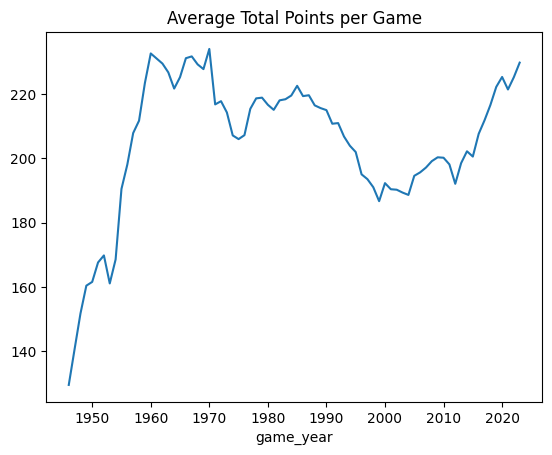

In [ ]:
nba_y.plot(title='Average Total Points per Game')

Some interesting takeaways:
In 1946, zone defenses were outlawed wich produced a spike in scoring in the 1950s

1960's basketball was a alot more fast paced compared to the 50's. however, in '54-'55 the 24 second shot clock was and bonus free throws for team fouls in a quarter were introduced which gave teams more possesions of the ball throughout the game which meant more avg points per game. In '59-'60, the 3 second violation, which permitted defenders from standing in the key for more than 3 seconds, helped a boost in scoring.

The three point line was first introduced in the 1979-1980 seasons, which boosted scoring in the 80's

2010's boost in scoring was a boost in foul calling which made it tougher to play defense. A change in philosophy of shooting alot more 3's made scoring point alot more easier.

In [ ]:
#delete pre 3 point line era data
nba_3=nba_3.dropna(subset=['fg3_made', 'fg3_attempts', 'fg3_pct'])
nba_3.head()



,game_year,total_score,fgm_home,fga_home,fgm_away,fga_away,fg3_made,fg3_attempts,fg3_pct,fg2_made,fg2_attempts,fg2_pct,E(x)_2,E(x)_3
14165,1980,211.0,48.0,89.0,40.0,90.0,0.0,2.0,0.0,88.0,177.0,0.497175,0.994350,0.0
14166,1980,211.0,48.0,95.0,43.0,85.0,0.0,2.0,0.0,91.0,178.0,0.511236,1.022472,0.0
14167,1980,212.0,45.0,93.0,44.0,92.0,1.0,5.0,0.2,88.0,180.0,0.488889,0.977778,0.6
14169,1980,211.0,41.0,91.0,42.0,94.0,0.0,3.0,0.0,83.0,182.0,0.456044,0.912088,0.0
14170,1980,230.0,47.0,89.0,45.0,92.0,0.0,8.0,0.0,92.0,173.0,0.531792,1.063584,0.0


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

In [ ]:
nba_E3=nba_3.groupby('game_year')['E(x)_3'].mean()
nba_E3.head(10)

game_year
1980    0.120000
1981    0.668651
1982    0.703830
1983    0.697799
1984    0.644449
1985         NaN
1986    0.803085
1987    0.855456
1988    0.917498
1989    0.926027
Name: E(x)_3, dtype: float64

In [ ]:
nba_E2=nba_3.groupby('game_year')['E(x)_2'].mean()
nba_E2.head()

game_year
1980    0.994054
1981    0.972611
1982    0.996302
1983    0.970936
1984    0.992202
Name: E(x)_2, dtype: float64

In [ ]:
nba_expected= pd.DataFrame({
    'Expected Points: 2pt_atempts': nba_E2,
    'Expected Points: 3pt_attempts': nba_E3
})
nba_expected.head(10)

,Expected Points: 2pt_atempts,Expected Points: 3pt_attempts
game_year,,
1980,0.994054,0.120000
1981,0.972611,0.668651
1982,0.996302,0.703830
1983,0.970936,0.697799
1984,0.992202,0.644449
1985,0.988199,NaN
1986,0.987207,0.803085
1987,0.983947,0.855456
1988,0.981328,0.917498


In [ ]:
nba_expected.fillna(0.756432)
nba_expected.head()

,Expected Points: 2pt_atempts,Expected Points: 3pt_attempts
game_year,,
1980,0.994054,0.120000
1981,0.972611,0.668651
1982,0.996302,0.703830
1983,0.970936,0.697799
1984,0.992202,0.644449


In [ ]:
nba_expected.isna().sum()

Expected Points: 2pt_atempts     0
Expected Points: 3pt_attempts    1
dtype: int64

In [ ]:
nba_expected.fillna(0.756432)
nba_expected.head()

,Expected Points: 2pt_atempts,Expected Points: 3pt_attempts
game_year,,
1980,0.994054,0.120000
1981,0.972611,0.668651
1982,0.996302,0.703830
1983,0.970936,0.697799
1984,0.992202,0.644449


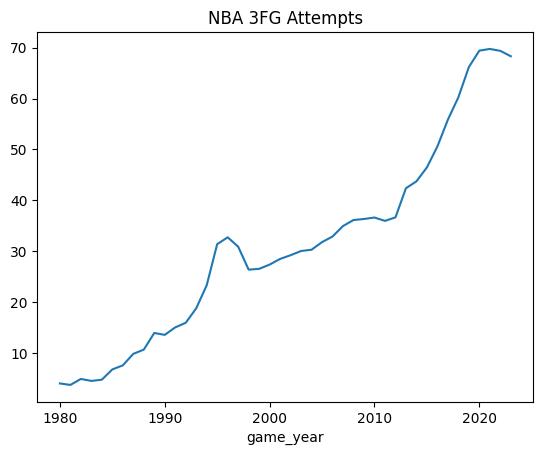

In [ ]:
nba_3attempts.plot(title='NBA 3FG Attempts')
plt.show()

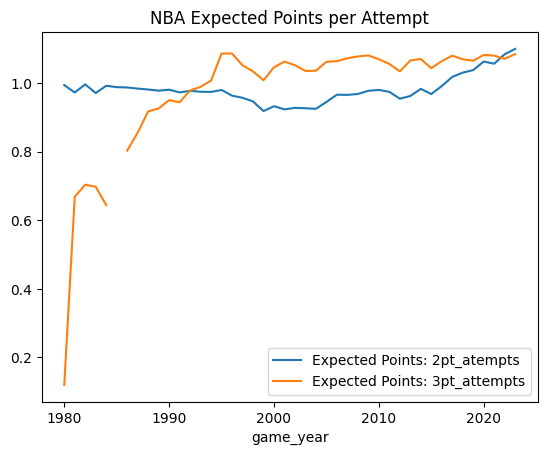

In [ ]:
nba_expected.plot(title='NBA Expected Points per Attempt')
plt.show()

As teams started to realized that their expected points were better if they shot a three, the league started to place more value in shooting. However, in the last two years, the expected value for 2 pt attempts has been higher than 3pt attempts for the first time sinc the 1990's. This should be intereting to see if more teams start to value the 2 point shot a litte more in the upcoming years and start to shoot less threes.

In the 2023, the 3 point attempts per game fell to 68.3 compared to 69.4 in 2022. The lowest attempt per game since 2018 at 66.2. Perhaps this is another change in scoring philosophy? Time will tell in the next few years

In [ ]:
nba_3attempts=nba_3.groupby('game_year')['fg3_attempts'].mean()
nba_3attempts.tail()

game_year
2019    66.185478
2020    69.412181
2021    69.752000
2022    69.372754
2023    68.308594
Name: fg3_attempts, dtype: float64

In [ ]:
nba_ex_attempts= pd.DataFrame({
    'Expected Points: 2pt_atempts': nba_E2,
    'Expected Points: 3pt_attempts': nba_E3,
    '3FG_Attempts':nba_3attempts
})
nba_ex_attempts.head()

,Expected Points: 2pt_atempts,Expected Points: 3pt_attempts,3FG_Attempts
game_year,,,
1980,0.994054,0.120000,4.000000
1981,0.972611,0.668651,3.708333
1982,0.996302,0.703830,4.884058
1983,0.970936,0.697799,4.494949
1984,0.992202,0.644449,4.736842
